In [ ]:
from google.colab import files
uploaded=files.upload()

Saving data_dummie.csv to data_dummie.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
# Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
def evaluacion_metrica(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
def modelo(valor_neurona,valor_epoca):
    df=pd.read_csv('data_dummie.csv')
    # Convertir a un formato de datetime
    from datetime import datetime
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    df = df.set_index("Fecha")
    df.index.freq = '17T'
    dataset = df.Volumen.values #numpy.ndarray
    dataset = dataset.astype('float32')
    dataset = np.reshape(dataset, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    train_size = int(len(dataset) * 0.80)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    def create_dataset(dataset, look_back=1):
        X, Y = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            X.append(a)
            Y.append(dataset[i + look_back, 0])
        return np.array(X), np.array(Y)

    look_back = 30
    X_train, Y_train = create_dataset(train, look_back)
    X_test, Y_test = create_dataset(test, look_back)

    # reshape input to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
    model = Sequential()
    model.add(LSTM(valor_neurona, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    history = model.fit(X_train, Y_train, epochs=valor_epoca, batch_size=70, validation_data=(X_test, Y_test), 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

    model.summary()
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    # invert predictions
    train_predict = scaler.inverse_transform(train_predict)
    Y_train = scaler.inverse_transform([Y_train])
    test_predict = scaler.inverse_transform(test_predict)
    Y_test = scaler.inverse_transform([Y_test])
    aa=[x for x in range(5230)]
    plt.figure(figsize=(8,4))
    plt.plot(aa, Y_test[0][:5230], marker='.', label="actual")
    plt.plot(aa, test_predict[:,0][:5230], 'r', label="prediction")
    # plt.tick_params(left=False, labelleft=True) #remove ticks
    plt.tight_layout()
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Volumen', size=15)
    plt.xlabel('Fecha', size=15)
    plt.legend(fontsize=15)
    plt.show();
    datos=pd.DataFrame(test_predict)
    datos = datos.rename(columns={0:'Prediccion'})
    fecha=pd.date_range(end='2022-12-31',periods=5230,freq='17Min')
    datos['Fecha']=fecha
    from datetime import datetime
    datos['Fecha'] = pd.to_datetime(datos['Fecha'])
    datos = datos.set_index("Fecha")
    datos.index.freq = '17T'
    datos2=pd.DataFrame(Y_test).T
    datos2 = datos2.rename(columns={0:'Volumen'})
    datos2['Fecha']=fecha
    # Convertir a un formato de datetime
    from datetime import datetime
    datos2['Fecha'] = pd.to_datetime(datos2['Fecha'])
    datos2 = datos2.set_index("Fecha")
    datos2.index.freq = '17T'
    datos['Volumen']=datos2['Volumen']
    ax = df.loc[(df.index > '10-28-2022') & (df.index < '30-12-2022')]['Volumen'] \
        .plot(figsize=(15, 5), title='LSTM ')
    datos.loc[(datos.index > '11-01-2022') & (datos.index < '30-12-2022')]['Prediccion'] \
        .plot(style='-')
    plt.legend(['Datos Reales','Prediccion'])
    plt.show()
    evaluacion_metrica(datos['Prediccion'],datos['Volumen'])

Epoch 1/5
301/301 [==============================] - 4s 5ms/step - loss: 0.0235 - val_loss: 0.0095
Epoch 2/5
301/301 [==============================] - 1s 4ms/step - loss: 0.0122 - val_loss: 0.0063
Epoch 3/5
301/301 [==============================] - 1s 3ms/step - loss: 0.0093 - val_loss: 0.0050
Epoch 4/5
301/301 [==============================] - 1s 3ms/step - loss: 0.0080 - val_loss: 0.0041
Epoch 5/5
301/301 [==============================] - 1s 4ms/step - loss: 0.0070 - val_loss: 0.0035
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5)                 720       
                                                                 
 dropout_4 (Dropout)         (None, 5)                 0         
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                     

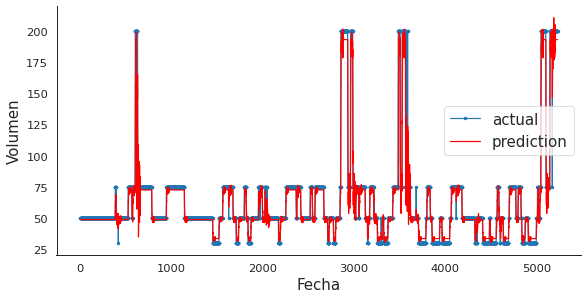

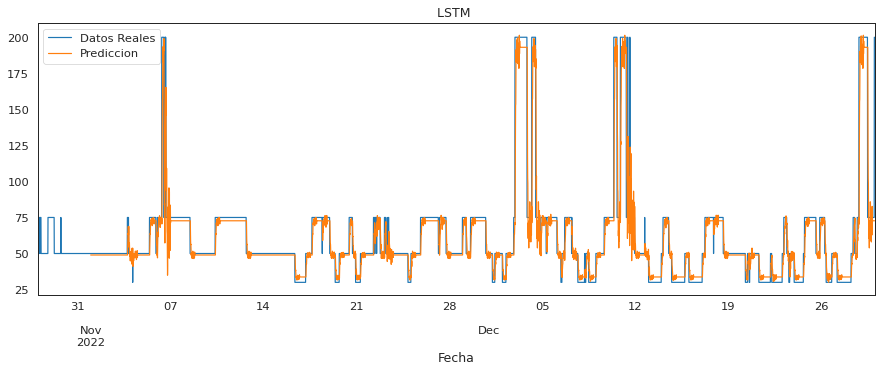

Evaluation metric results:-
MSE is : 124.96641749604957
MAE is : 4.722358492982734
RMSE is : 11.17883793137952
MAPE is : 7.531373501893575
R2 is : 0.8977281446576324

5 5


In [ ]:
n=0
neurona=5
epoca=n
while True: 
    epoca=epoca+5
    modelo(neurona,epoca)
    print(neurona,epoca)
    if epoca>n:
        break